Neural Network Classification using MLP Classifier in sklearn

We will predict the ocean proximity (`ocean_proximity` column) of Californian districts, given a number of features from these districts.

**The unit of analysis is a DISTRICT**

In [2]:
# Common imports
import numpy as np
import pandas as pd

# Get the data

In [5]:
housing = pd.read_csv("housing.csv")
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
#Drop the missing values
housing.dropna(axis=0, inplace=True)

# pandas specific issue - why you might want to reset the index
# housing.reset_index(inplace=True, drop=True)

housing.describe()
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


# Prepare the data for Machine Learning algorithms

In [7]:
#Set the training and test data sets
housing_X = housing.drop("ocean_proximity", axis=1) # drop labels 
#Select the label
housing_target = housing["ocean_proximity"]
housing_target.value_counts()

<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: ocean_proximity, dtype: int64

### Standardize the data

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

housing_X_std = scaler.fit_transform(housing_X)

In [9]:
housing_X_std

array([[-1.32731375,  1.05171726,  0.98216331, ..., -0.97683327,
         2.34516291,  2.12881864],
       [-1.32232256,  1.04235526, -0.60621017, ...,  1.67037262,
         2.33263161,  1.31362603],
       [-1.33230494,  1.03767426,  1.85576873, ..., -0.84342665,
         1.78293943,  1.25818254],
       ...,
       [-0.82320322,  1.77727236, -0.92388486, ..., -0.17377773,
        -1.14317103, -0.99247676],
       [-0.87311515,  1.77727236, -0.84446619, ..., -0.39350628,
        -1.05513604, -1.05831591],
       [-0.83318561,  1.74918635, -1.00330353, ...,  0.07995643,
        -0.78060586, -1.01759959]])

In [10]:
housing_X_std.shape
type(housing_target)

pandas.core.series.Series

# Split data (train/test)

In [11]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(housing_X_std, housing_target, test_size=0.3)

In [12]:
train_x.shape, test_x.shape

((14303, 9), (6130, 9))

# Multiclass classification



In [13]:
from sklearn.neural_network import MLPClassifier

#Default settings create 1 hidden layer with 100 neurons
#look at MLPClassifier documentation in sklearn to see which parameters can be modified
mlp_clf = MLPClassifier(hidden_layer_sizes=(100,))

mlp_clf.fit(train_x, train_y)

/Users/balajismbpro/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier()

## Increase maximum iterations for convergence

In [14]:
mlp_clf = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, verbose=True)

mlp_clf.fit(train_x, train_y)

# default loss function is cross-entropy or log-loss 
# classifier predicts a probability (0-1), while the actual is 0 or 1 see doc below
# https://ml-cheatsheet.readthedocs.io/en/latest/loss_functions.html

Iteration 1, loss = 1.23774407
Iteration 2, loss = 0.86677426
Iteration 3, loss = 0.75589322
Iteration 4, loss = 0.69059735
Iteration 5, loss = 0.64510894
Iteration 6, loss = 0.60941951
Iteration 7, loss = 0.58039365
Iteration 8, loss = 0.55284522
Iteration 9, loss = 0.52810677
Iteration 10, loss = 0.50554344
Iteration 11, loss = 0.48512075
Iteration 12, loss = 0.46635396
Iteration 13, loss = 0.44899962
Iteration 14, loss = 0.43408354
Iteration 15, loss = 0.42061559
Iteration 16, loss = 0.40790120
Iteration 17, loss = 0.39732865
Iteration 18, loss = 0.38701849
Iteration 19, loss = 0.37817290
Iteration 20, loss = 0.37085247
Iteration 21, loss = 0.36118470
Iteration 22, loss = 0.35495777
Iteration 23, loss = 0.34911657
Iteration 24, loss = 0.34189531
Iteration 25, loss = 0.33774593
Iteration 26, loss = 0.33101111
Iteration 27, loss = 0.32664146
Iteration 28, loss = 0.32114685
Iteration 29, loss = 0.31632142
Iteration 30, loss = 0.31345436
Iteration 31, loss = 0.30980534
Iteration 32, los

Iteration 256, loss = 0.17445493
Iteration 257, loss = 0.17584325
Iteration 258, loss = 0.17489281
Iteration 259, loss = 0.17638690
Iteration 260, loss = 0.17433427
Iteration 261, loss = 0.17471863
Iteration 262, loss = 0.17438480
Iteration 263, loss = 0.17379378
Iteration 264, loss = 0.17563527
Iteration 265, loss = 0.17332480
Iteration 266, loss = 0.17368491
Iteration 267, loss = 0.17464267
Iteration 268, loss = 0.17295532
Iteration 269, loss = 0.17431571
Iteration 270, loss = 0.17289409
Iteration 271, loss = 0.17412473
Iteration 272, loss = 0.17338758
Iteration 273, loss = 0.17169661
Iteration 274, loss = 0.17179368
Iteration 275, loss = 0.17146743
Iteration 276, loss = 0.17116775
Iteration 277, loss = 0.17097835
Iteration 278, loss = 0.17129734
Iteration 279, loss = 0.17129051
Iteration 280, loss = 0.17157549
Iteration 281, loss = 0.17076698
Iteration 282, loss = 0.17008921
Iteration 283, loss = 0.17137844
Iteration 284, loss = 0.17079752
Iteration 285, loss = 0.17055334
Iteration 

Iteration 505, loss = 0.14477641
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


MLPClassifier(max_iter=1000, verbose=True)

# Classification Matrix

In [15]:
test_y_pred = mlp_clf.predict(test_x)

In [16]:
from sklearn.metrics import confusion_matrix

confusion_matrix(test_y, test_y_pred)

array([[2500,   45,   17,   86],
       [  53, 1929,    4,    0],
       [  33,    4,  641,   17],
       [ 145,    0,   14,  642]])

In [17]:
from sklearn.metrics import accuracy_score

print(accuracy_score(test_y, test_y_pred))

0.931810766721044


# Change the number of neurons

In [18]:
#Increase neurons from 100 to 200
mlp_clf = MLPClassifier(max_iter=1000, verbose=True,
                        hidden_layer_sizes=(200,))

mlp_clf.fit(train_x, train_y)

Iteration 1, loss = 1.07665520
Iteration 2, loss = 0.77140823
Iteration 3, loss = 0.66817168
Iteration 4, loss = 0.60773372
Iteration 5, loss = 0.56201671
Iteration 6, loss = 0.52523229
Iteration 7, loss = 0.49393103
Iteration 8, loss = 0.46616753
Iteration 9, loss = 0.44395169
Iteration 10, loss = 0.42374618
Iteration 11, loss = 0.40714454
Iteration 12, loss = 0.39162391
Iteration 13, loss = 0.37807186
Iteration 14, loss = 0.36669824
Iteration 15, loss = 0.35625169
Iteration 16, loss = 0.34691681
Iteration 17, loss = 0.33955587
Iteration 18, loss = 0.33074014
Iteration 19, loss = 0.32372723
Iteration 20, loss = 0.31666862
Iteration 21, loss = 0.31121161
Iteration 22, loss = 0.30751974
Iteration 23, loss = 0.30151788
Iteration 24, loss = 0.29739494
Iteration 25, loss = 0.29297470
Iteration 26, loss = 0.28898589
Iteration 27, loss = 0.28641664
Iteration 28, loss = 0.28145054
Iteration 29, loss = 0.28077429
Iteration 30, loss = 0.27602116
Iteration 31, loss = 0.27349818
Iteration 32, los

Iteration 253, loss = 0.15007190
Iteration 254, loss = 0.15057881
Iteration 255, loss = 0.15061505
Iteration 256, loss = 0.15136623
Iteration 257, loss = 0.14855094
Iteration 258, loss = 0.14865903
Iteration 259, loss = 0.14959358
Iteration 260, loss = 0.15014809
Iteration 261, loss = 0.14939778
Iteration 262, loss = 0.15262056
Iteration 263, loss = 0.14942259
Iteration 264, loss = 0.14955455
Iteration 265, loss = 0.14797066
Iteration 266, loss = 0.14751468
Iteration 267, loss = 0.15076922
Iteration 268, loss = 0.14771222
Iteration 269, loss = 0.14584924
Iteration 270, loss = 0.14719228
Iteration 271, loss = 0.14651429
Iteration 272, loss = 0.14597038
Iteration 273, loss = 0.14702139
Iteration 274, loss = 0.14616104
Iteration 275, loss = 0.14548016
Iteration 276, loss = 0.14544100
Iteration 277, loss = 0.14560926
Iteration 278, loss = 0.14583891
Iteration 279, loss = 0.14632315
Iteration 280, loss = 0.14414097
Iteration 281, loss = 0.14498105
Iteration 282, loss = 0.14571650
Iteration 

MLPClassifier(hidden_layer_sizes=(200,), max_iter=1000, verbose=True)

In [19]:
test_y_pred = mlp_clf.predict(test_x)

print(accuracy_score(test_y, test_y_pred))

0.933768352365416


# Deep Neural Network

In [20]:
dnn_clf = MLPClassifier(hidden_layer_sizes=(50,25,10),
                       max_iter=1000)

dnn_clf.fit(train_x, train_y)

MLPClassifier(hidden_layer_sizes=(50, 25, 10), max_iter=1000)

In [21]:
#Let's check the number of iterations:
dnn_clf.n_iter_

262

In [22]:
#Let's check the number of layers:
dnn_clf.n_layers_

5

In [23]:
test_y_pred = dnn_clf.predict(test_x)

print(accuracy_score(test_y, test_y_pred))


0.9489396411092985


# Deeper Neural Network

In [24]:
dnn_clf = MLPClassifier(hidden_layer_sizes=(100,80,60,40,20,10),
                       max_iter=1000)

dnn_clf.fit(train_x, train_y)

MLPClassifier(hidden_layer_sizes=(100, 80, 60, 40, 20, 10), max_iter=1000)

In [25]:
#Let's check the number of iterations:
dnn_clf.n_iter_

137

In [26]:
#Let's check the number of layers:
dnn_clf.n_layers_

8

In [27]:
test_y_pred = dnn_clf.predict(test_x)

print(accuracy_score(test_y, test_y_pred))

0.9430668841761827


## Early stopping

In [28]:
dnn_clf = MLPClassifier(hidden_layer_sizes=(50,25,10),
                       max_iter=1000,
                       early_stopping=True)

dnn_clf.fit(train_x, train_y)

MLPClassifier(early_stopping=True, hidden_layer_sizes=(50, 25, 10),
              max_iter=1000)

In [29]:
#Let's check the number of iterations:
dnn_clf.n_iter_

112

In [30]:
test_y_pred = dnn_clf.predict(test_x)

print(accuracy_score(test_y, test_y_pred))


0.9296900489396411


## Activation function

In [31]:
dnn_clf = MLPClassifier(hidden_layer_sizes=(50,25,10),
                       max_iter=1000,
                       activation = 'tanh')

dnn_clf.fit(train_x, train_y)

MLPClassifier(activation='tanh', hidden_layer_sizes=(50, 25, 10), max_iter=1000)

In [32]:
test_y_pred = dnn_clf.predict(test_x)

print(accuracy_score(test_y, test_y_pred))

0.9487765089722675


## Solver (Optimizer)

In [33]:
#Let's use Stochastic Gradient Descent optimizer

dnn_clf = MLPClassifier(hidden_layer_sizes=(50,25,10),
                       max_iter=1000,
                       activation = 'tanh',
                       solver='sgd')

dnn_clf.fit(train_x, train_y)

MLPClassifier(activation='tanh', hidden_layer_sizes=(50, 25, 10), max_iter=1000,
              solver='sgd')

In [34]:
test_y_pred = dnn_clf.predict(test_x)

print(accuracy_score(test_y, test_y_pred))

0.9453507340946167


## Prediction probabilities

In [35]:
#Select a random observation

random = test_x[50:51]
random

array([[-1.2923754 ,  0.98618326,  1.37925668, -0.73562713, -0.84691963,
        -0.75711394, -0.7544889 , -0.20363968, -0.67021145]])

In [36]:
# Observe the input variables of the observation
dnn_clf.predict_proba(random)

array([[3.44410097e-03, 4.61619414e-04, 8.10017706e-05, 9.95997915e-01,
        1.53624277e-05]])

In [37]:
# Round the probability values
np.round(dnn_clf.predict_proba(random))

array([[0., 0., 0., 1., 0.]])

# Learning Curve

In [38]:
from matplotlib import pyplot as plt

No handles with labels found to put in legend.


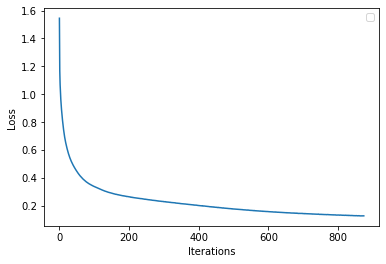

In [39]:
plt.plot(dnn_clf.loss_curve_)
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.legend()

In [41]:
plt.show()